In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'd:\AI\UdemyCoursesDataset.csv')
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [3]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [5]:
df.describe(include='object')

,course_title,price,level,content_duration,published_timestamp,subject
count,3682,3682,3682,3682,3682,3682
unique,3667,38,4,109,3676,4
top,Acoustic Blues Guitar Lessons,20,All Levels,1 hour,2014-04-15T21:48:55Z,Web Development
freq,3,830,1932,607,2,1200


Udemy_Courses_EDA

How many free courses?

In [6]:
len_freeCourses=len(df[df['price']=='Free'])
len_freeCourses

310

How many paid courses?

In [7]:
len_paidCourses=len(df[df['is_paid']==True])
len_paidCourses

3372

Which subject has the most popular courses (in terms of subscribers)?


In [8]:
df.loc[df['num_subscribers'].idxmax(), 'course_title']


'Learn HTML5 Programming From Scratch'

Which level has the highest number of subscribers?

In [9]:
df.groupby('level')['num_subscribers'].sum()

level
All Levels            6916112
Beginner Level        4052843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

In [10]:
df.groupby('level')['num_subscribers'].sum().idxmax()

'All Levels'

What are the top 10 most subscribed courses?


In [11]:
df[['course_title','num_subscribers']].sort_values('course_title',ascending=False).head(10)

,course_title,num_subscribers
1764,７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー,108
1765,６時間でインターバンク市場を攻略！最短距離でトレード基礎力,280
1973,캔바(Canva)로 SNS 콘텐츠 만들기,44
1123,超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜,8
1120,财务分析与估值建模入门,505
1125,資産運用の基礎を学ぶファイナンス入門,114
1122,调色高级讲解,4
1121,调色中级课程,5
1128,誰でもわかる Adobe Photoshop CS5,1
1127,誰でもわかる Adobe Illustrator CS6,11


What is the average price of a course across different subjects?


In [12]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.groupby('subject')['price'].mean()

subject
Business Finance       74.378966
Graphic Design         61.390845
Musical Instruments    53.154574
Web Development        86.635426
Name: price, dtype: float64

Which courses have the highest price, and how does that correlate with their popularity?


In [13]:
df[['course_title', 'price', 'num_subscribers']].sort_values('price', ascending=False).head(10)


,course_title,price,num_subscribers
3182,Suonare la Chitarra,200.0,1
2691,Penny Stocks King: How 2 really Trade Penny St...,200.0,1085
242,"Ajax in JavaScript and JQuery, with PHP - Crea...",200.0,3399
797,Complete Codeigniter: From Beginner to Advanced,200.0,2786
454,"Beginner Full Stack Web Development: HTML, CSS...",200.0,2687
1434,Get Started With Penny Stocks -Step by Step Gu...,200.0,7159
1436,Get to know HTML Learn HTML Basics,200.0,10674
1445,Getting started with JavaScript,200.0,1415
3166,Straddle Options Trading - Profit in Any Marke...,200.0,837
2722,Photoshop for Entrepreneurs - Design 11 Practi...,200.0,36288


If the correlation is close to 0, it means there is little to no relationship between the price and popularity.

In [14]:
df[['price', 'num_subscribers']].corr().iloc[0, 1]


0.22866986824136168

Which subject tends to have the longest courses in terms of content duration?


In [15]:
df.loc[df['content_duration'].idxmax(),'subject']

'Web Development'

Which year saw the highest number of courses being published?


In [16]:
df['published_timestamp']=pd.to_datetime(df['published_timestamp'])
df['year']=df['published_timestamp'].dt.year

In [17]:
df.loc[df['year'].value_counts().idxmax(),'year']

2016

What is the average number of reviews across different levels?


In [18]:
df.groupby('level')['num_reviews'].mean()

level
All Levels            209.265010
Beginner Level        101.562549
Expert Level           40.224138
Intermediate Level     92.674584
Name: num_reviews, dtype: float64

Which courses have the most number of lectures, and how does that relate to their price or popularity?

In [19]:
df.nlargest(10, 'num_lectures')[['course_title', 'num_lectures']]

,course_title,num_lectures
394,Back to School Web Development and Programming...,779
2416,Learn to Trade The News,544
3388,"Thoughtful Web Development Course: HTML, Vue.j...",536
1239,Financial Management - A Complete Study,527
769,Code & Grow Rich: Earn More As An Entrepreneu...,491
194,Advanced Accounting A Complete Study for CA / ...,462
2589,MCA Accountancy and Financial Management -Pape...,460
2332,Learn to build 20 websites and build 14 iOS9 a...,458
444,Become a Professional Web Developer | Version 3.0,454
858,Cost Accounting and Financial Management - A C...,444


In [20]:
df[['num_lectures', 'num_reviews']].corr()


,num_lectures,num_reviews
num_lectures,1.000000,0.243083
num_reviews,0.243083,1.000000


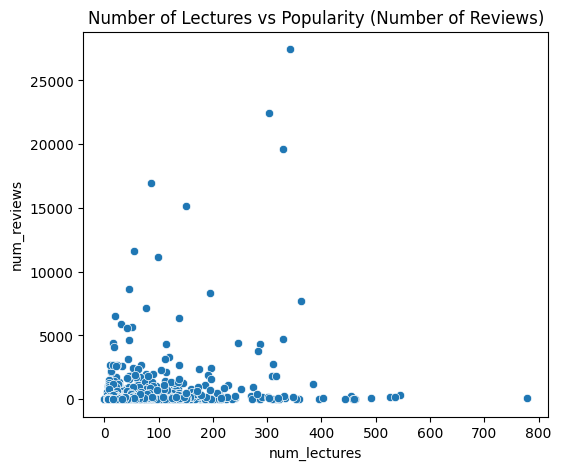

In [21]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='num_lectures', y='num_reviews', data=df)
plt.title('Number of Lectures vs Popularity (Number of Reviews)')
plt.show()


In [22]:
df[['num_lectures', 'price']].corr()

,num_lectures,price
num_lectures,1.000000,0.314621
price,0.314621,1.000000


In [23]:
df['price'].isna().sum()

310

In [24]:
df['price']=df['price'].fillna(0)

In [25]:
df[['num_lectures', 'price']].corr()

,num_lectures,price
num_lectures,1.000000,0.330495
price,0.330495,1.000000


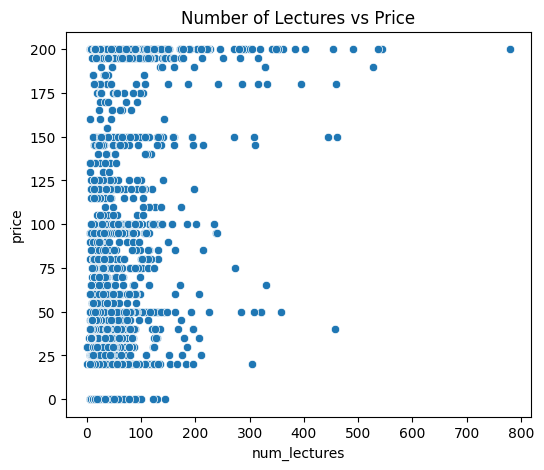

In [26]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='num_lectures', y='price', data=df)
plt.title('Number of Lectures vs Price')
plt.show()
